#Naive Bayes with Pytorch

##Some Interview Question

### 1) Naive Bayes là gì?
---
Naive Bayes là một thuật toán học máy có giám sát dựa trên khái niệm toán học định lý Bayes. Thuật toán này giả định các đặc trưng độc lập và không ảnh hưởng tới nhau. Và đó cũng chính là lý do thuật toán có tên là Naive Bayes với Naive có nghĩa là Ngây thơ.

###2) Cách hoạt động của Naive Bayes là gì?
---
Công thức Bayes:
$$P(Y|X) = \frac{P(X|Y) P(Y)}{P(X)}$$

Trong quá trình huấn luyện, mô hình sẽ học được:
+ $P(Y)$ là xác suất một điểm rơi vào class Y.
Việc tính toán $P(Y)$ rất đơn giản với công thức $$P(Y) = \frac{N_Y}{N}$$
Trong đó: 
  * $N_Y$ là số các mẫu có nhãn là Y
  * $N$ là tổng số mẫu trong tập dữ liệu huấn luyện.

+ $P(X|Y)$ là xác suất có điều kiện cho mỗi lớp theo một số điều kiện. Việc tính toán $P(X|Y)$ được đơn giản hóa với giả thiết các đặc trưng độc lập và không ảnh hưởng nhau, vậy nên
$$P(X|y) = \prod_{i=1}^np(x_i|y)$$
Việc tính toán $P(x_i|y)$ phụ thuộc vào loại dữ liệu. Có ba loại được sử dụng phổ biến là: Gaussian Naive Bayes, Multinomial Naive Bayes, và Bernoulli Naive.

###3) Các loại  Naive Bayes 
---
+ Gaussian Naive Bayes:Thường dùng cho dữ liệu có giá trị liên tục
+ Bernoulli Naive Bayes: Áp dụng trường dữ liệu nhị phân
+ Multinomial Naive Bayes: Chủ yếu thường dùng trong phân loại văn bản



###4) Ví dụ về cách hoạt động Naive Bayes?
---
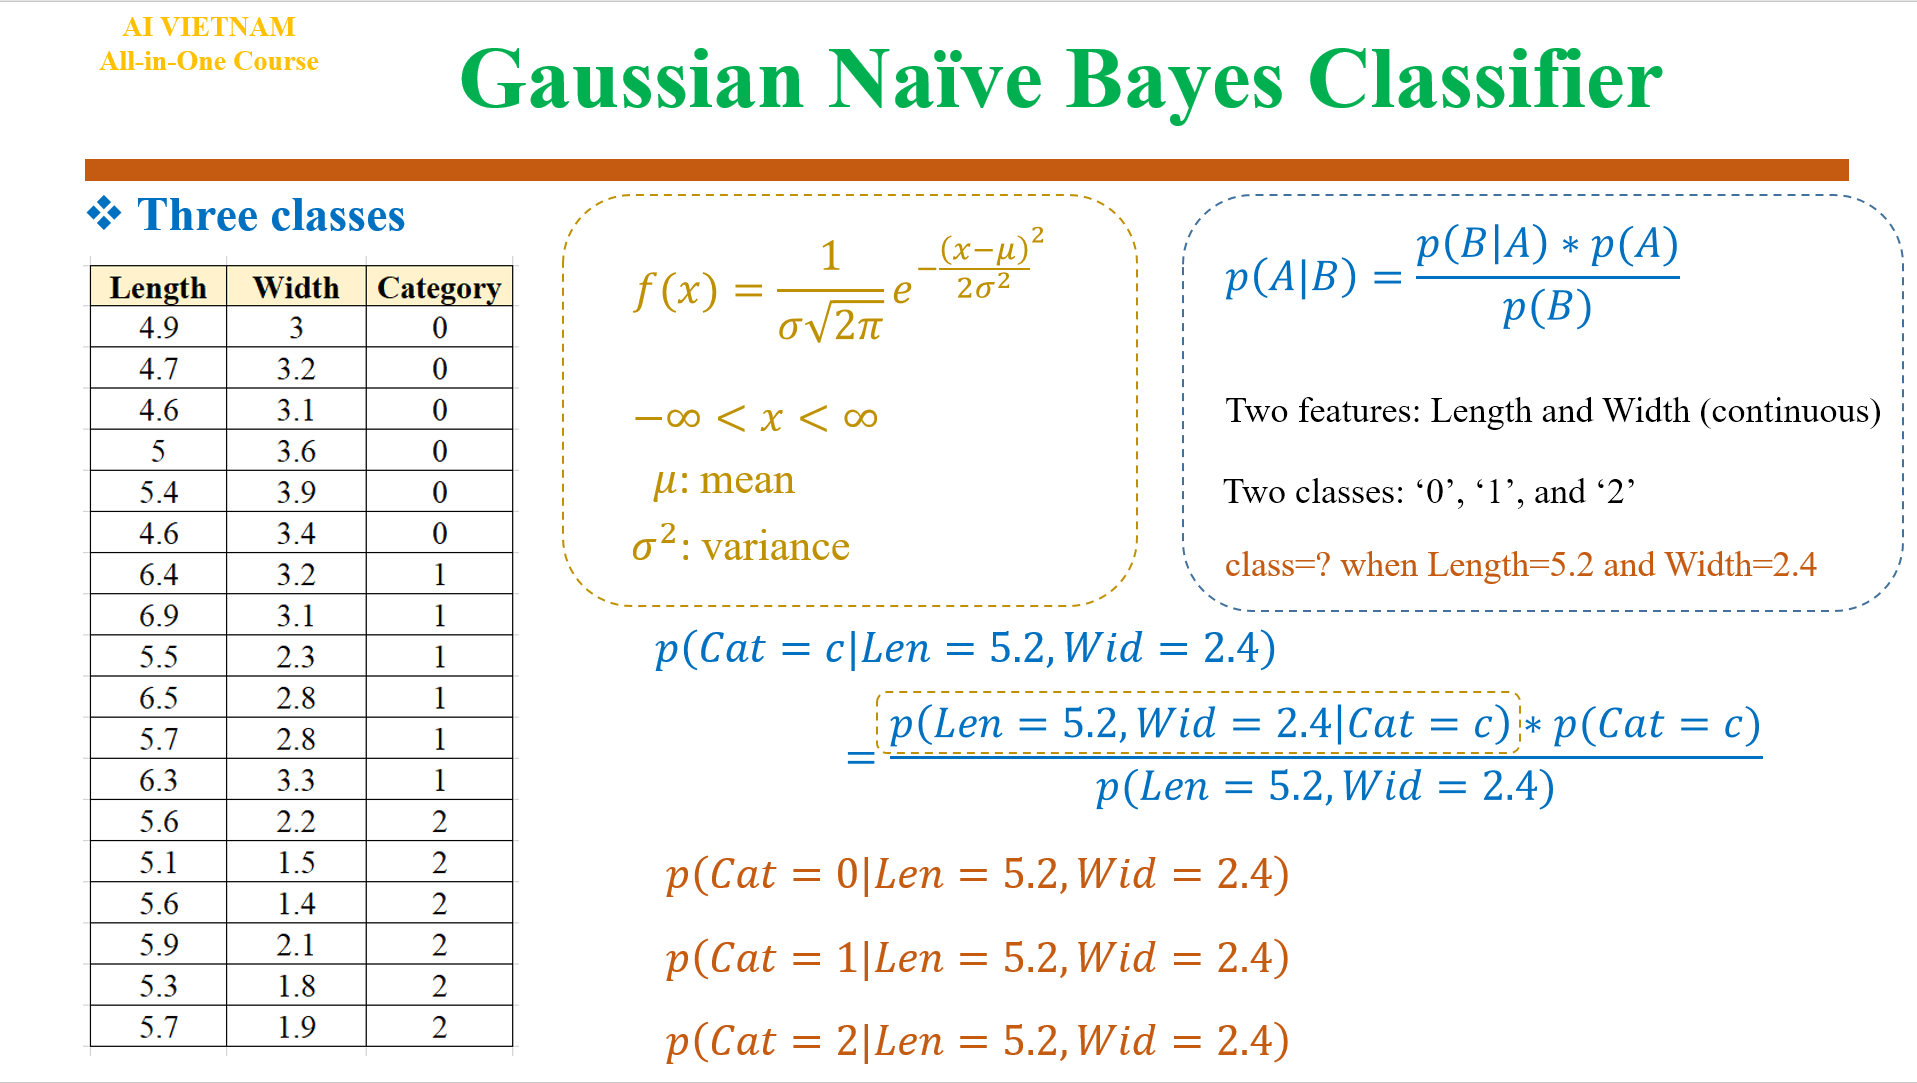

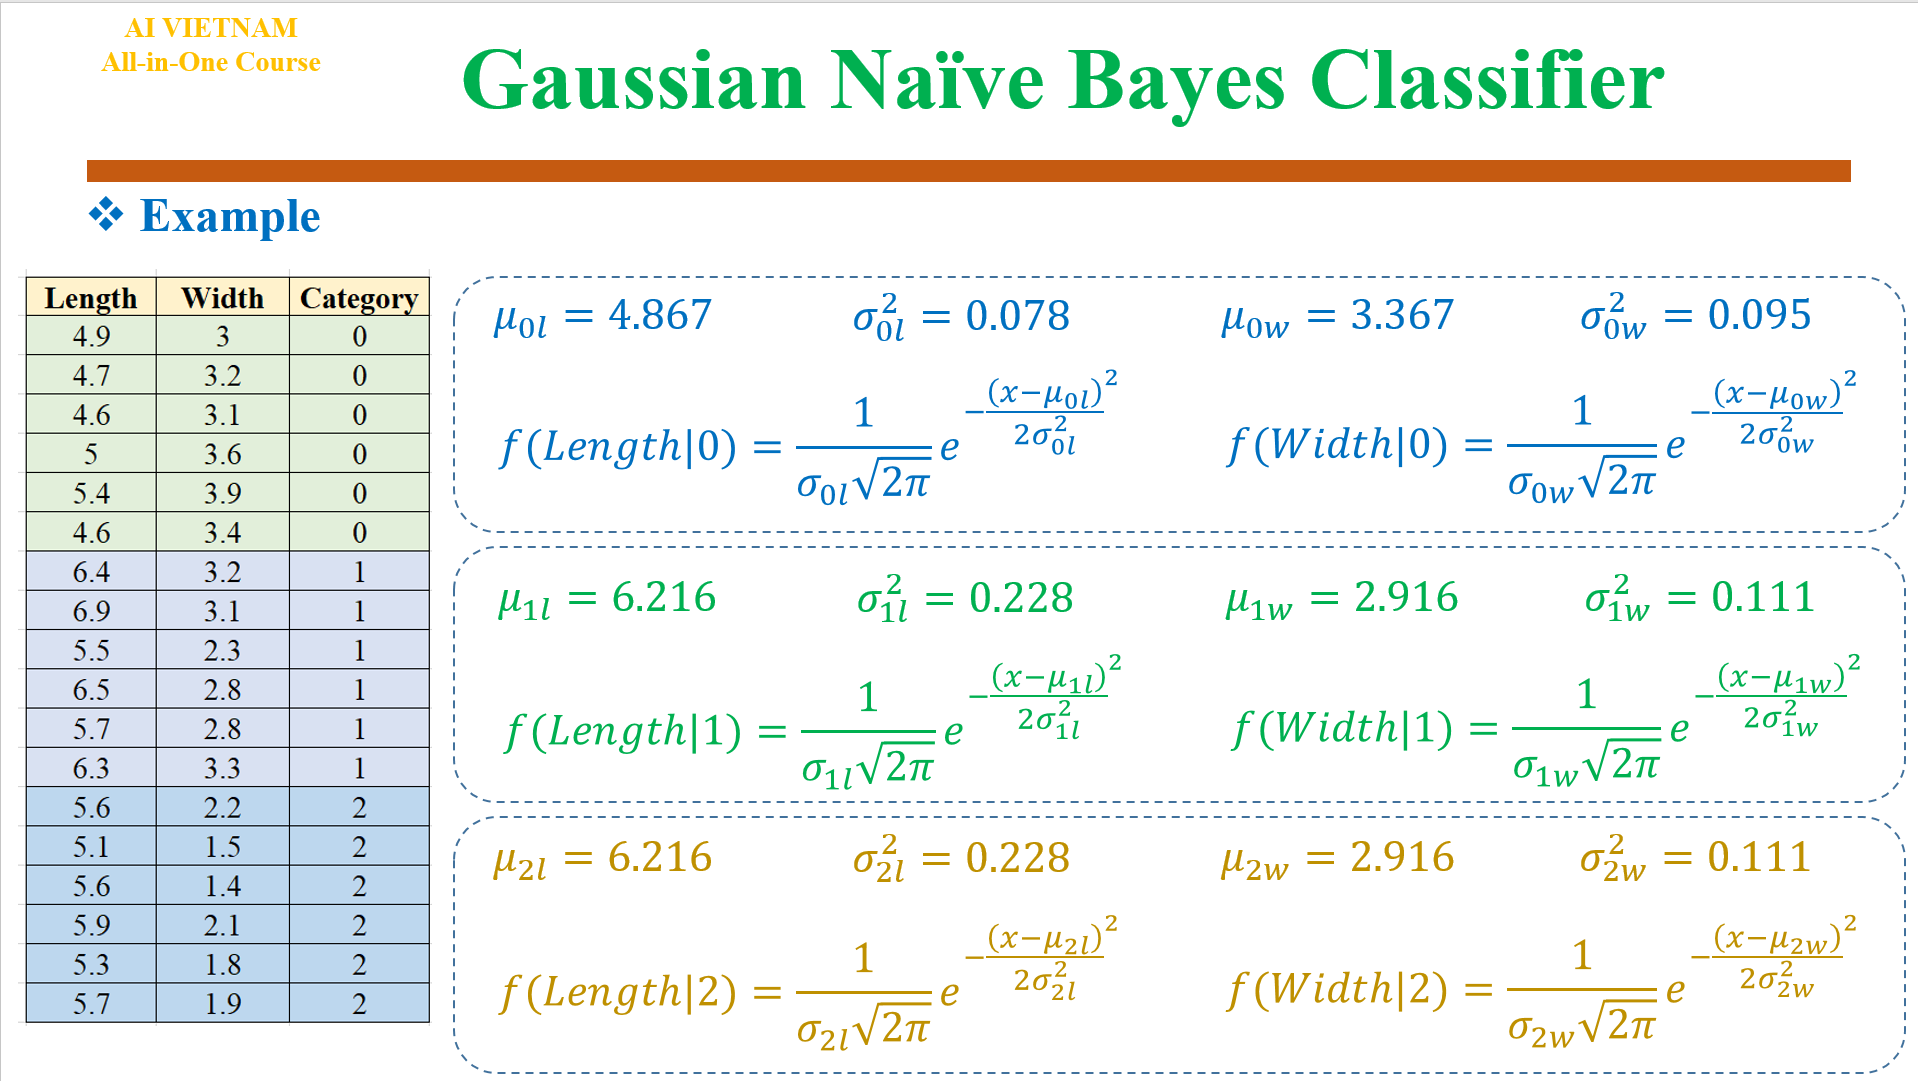

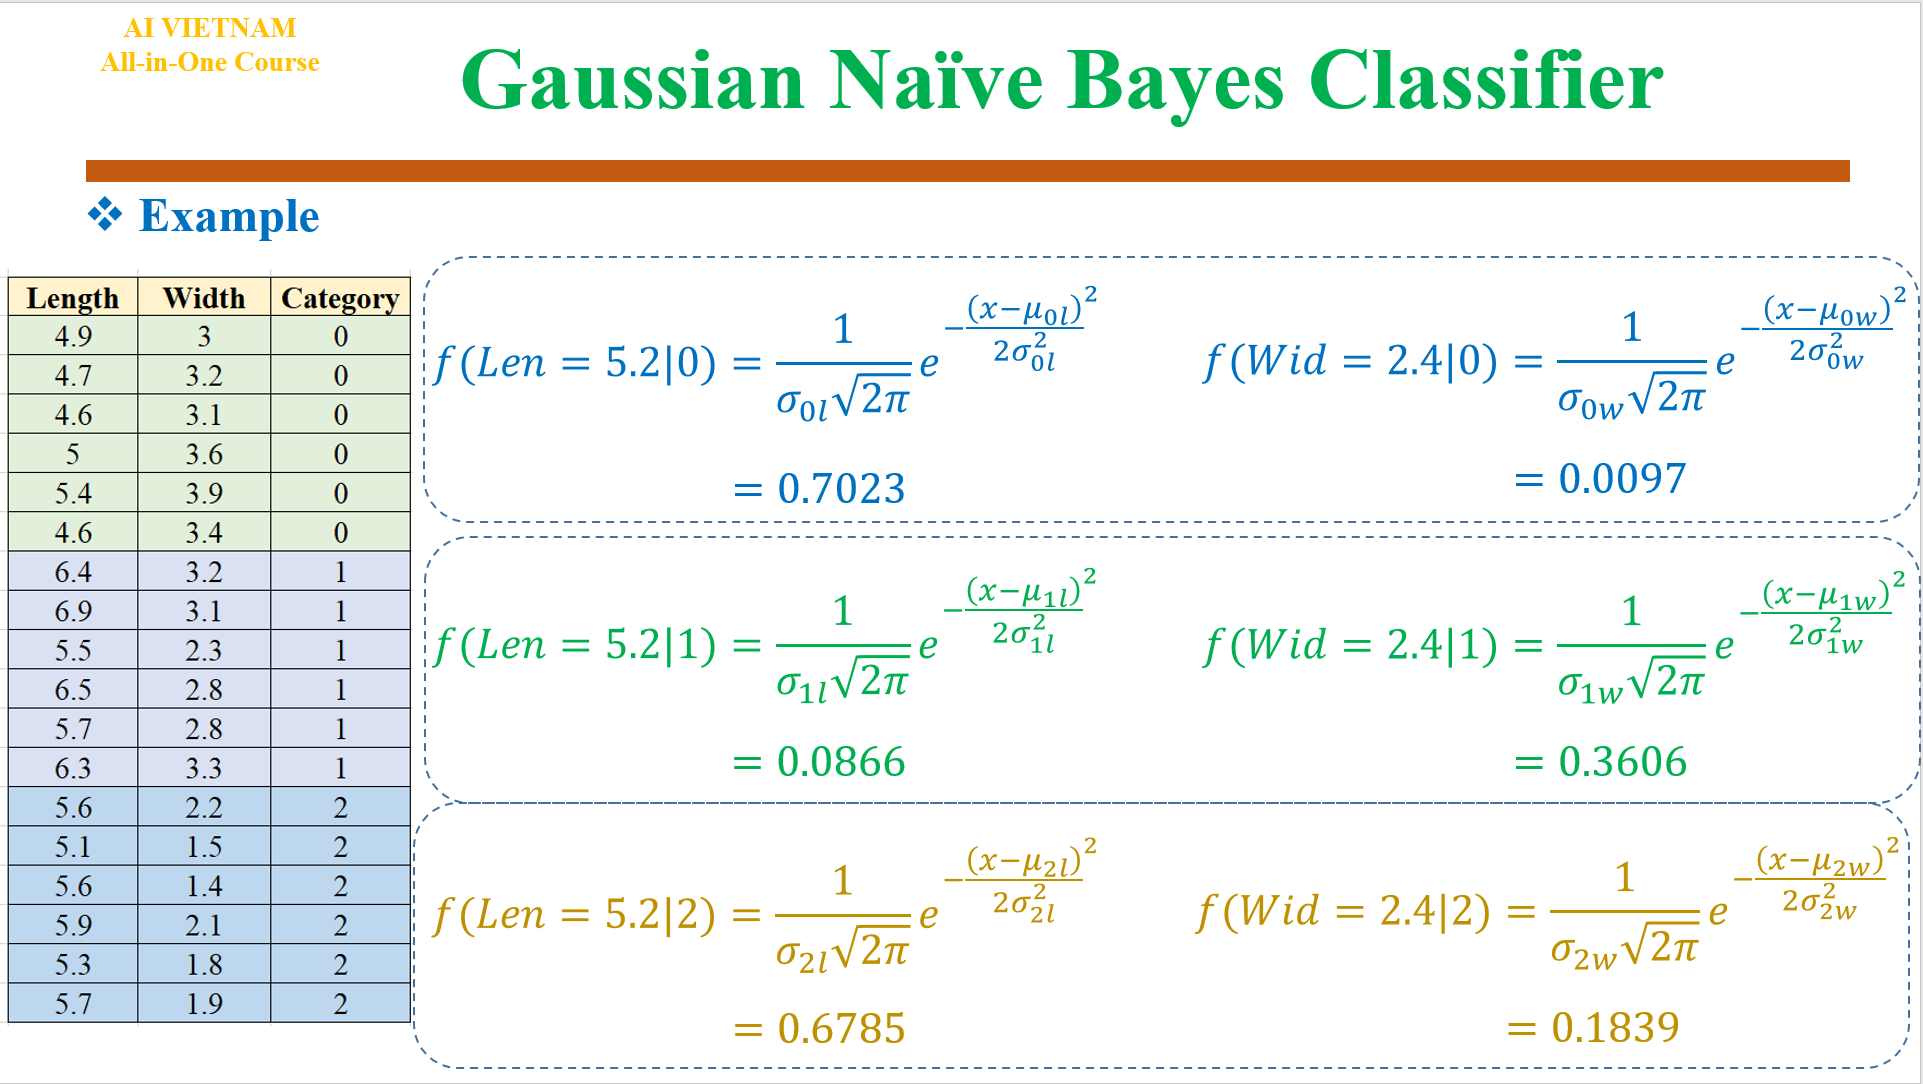

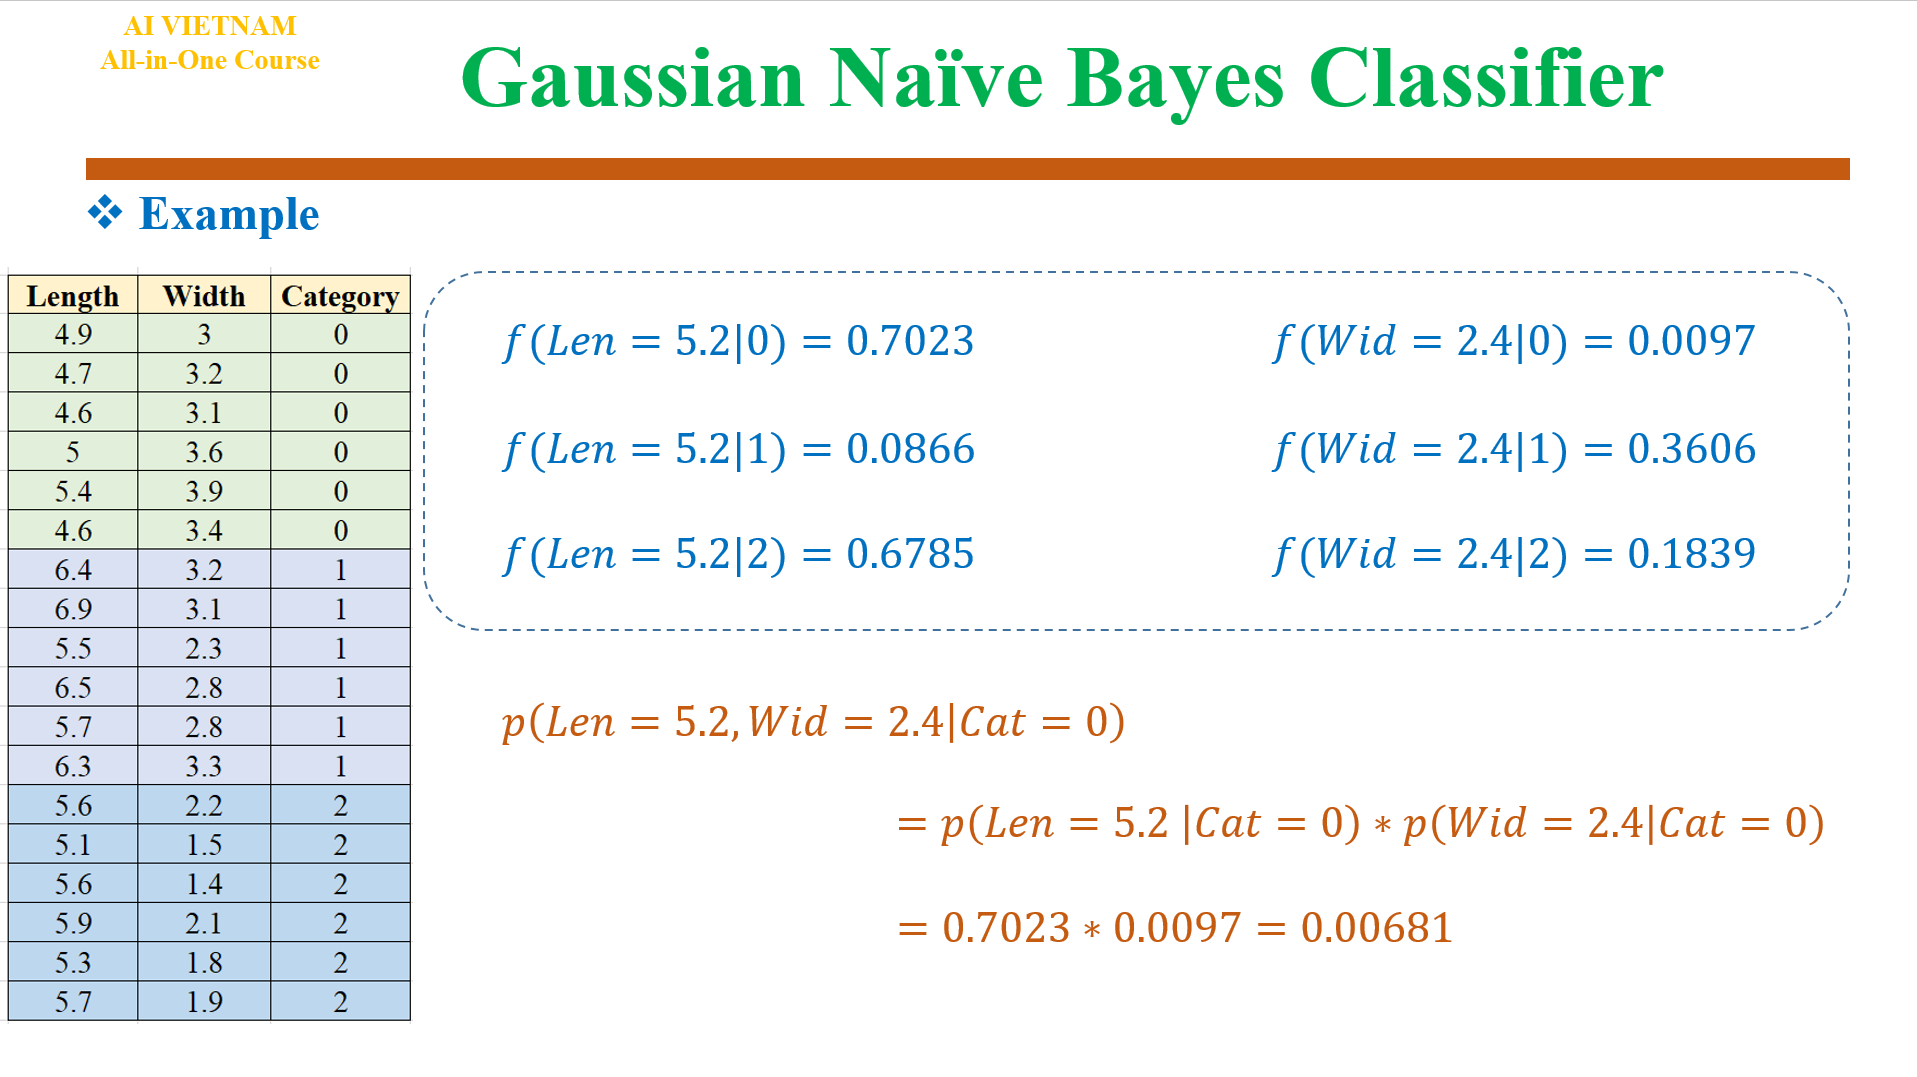

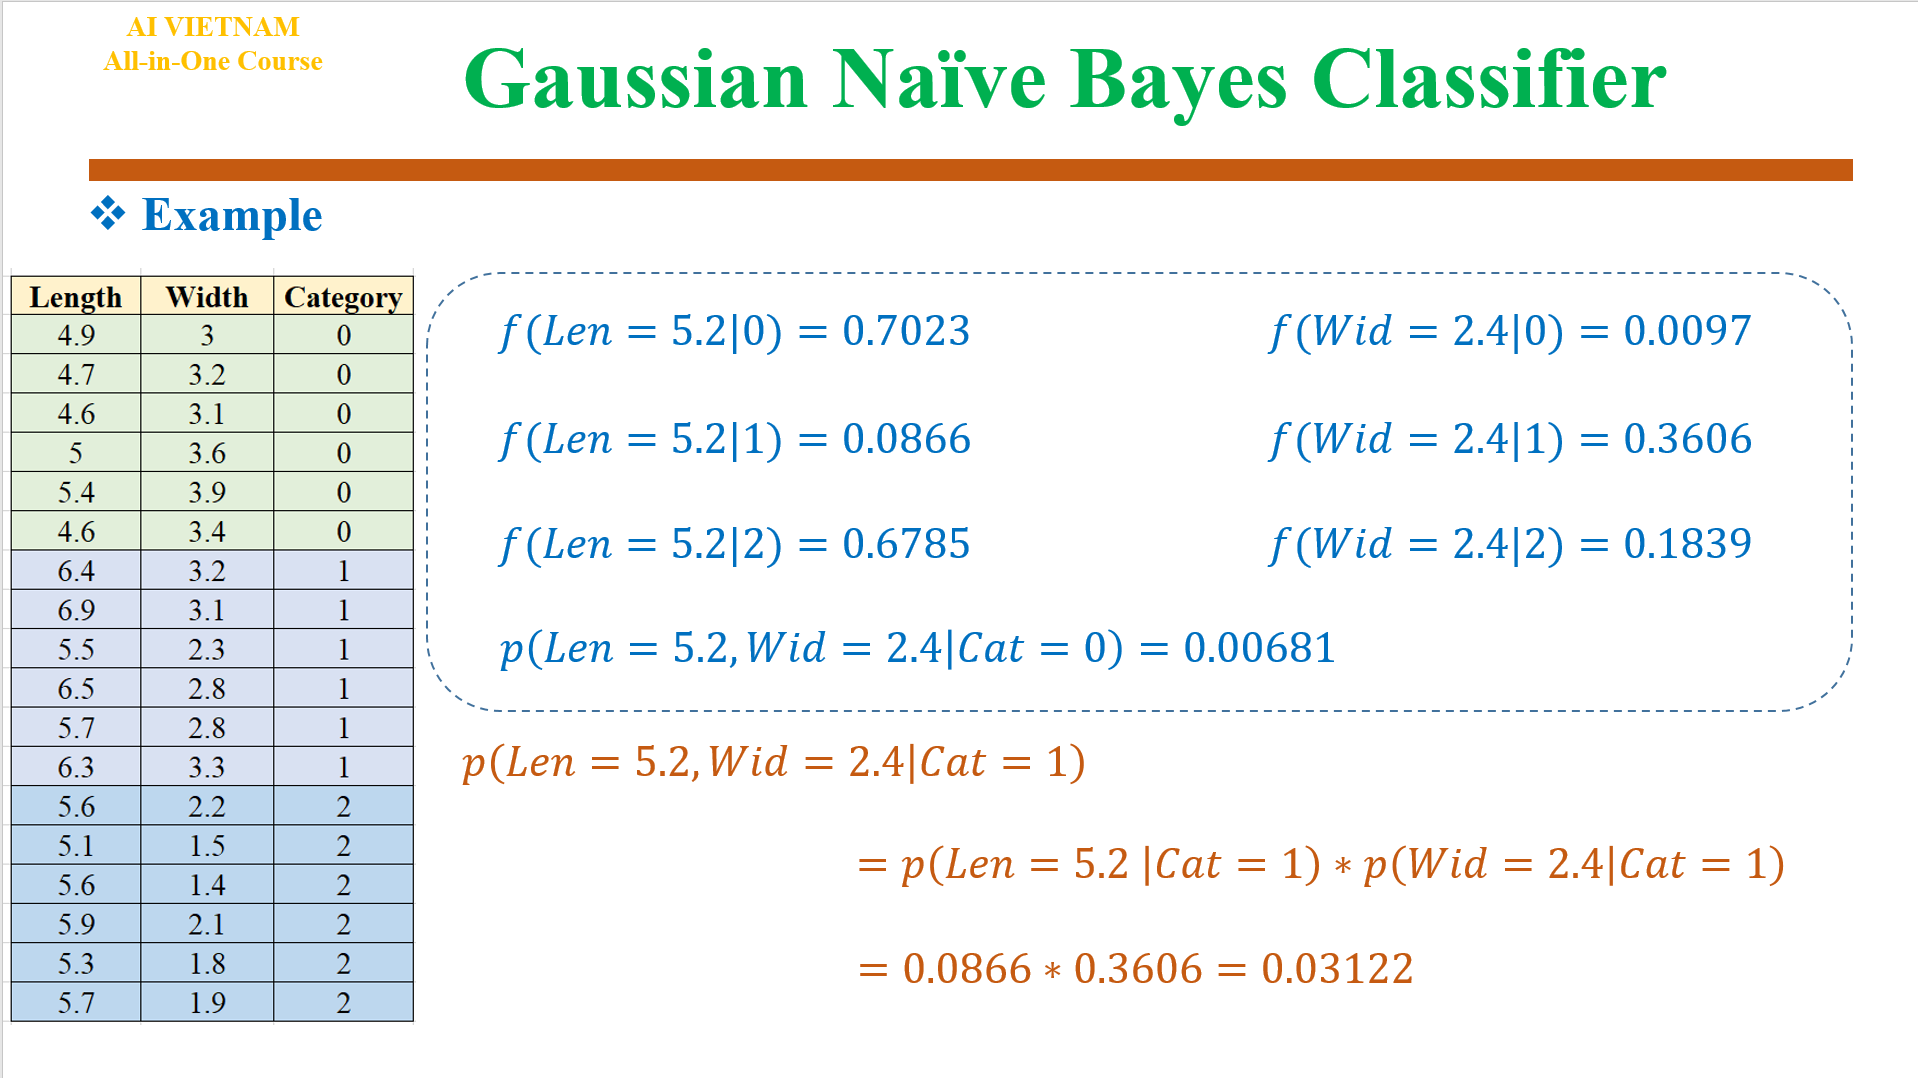

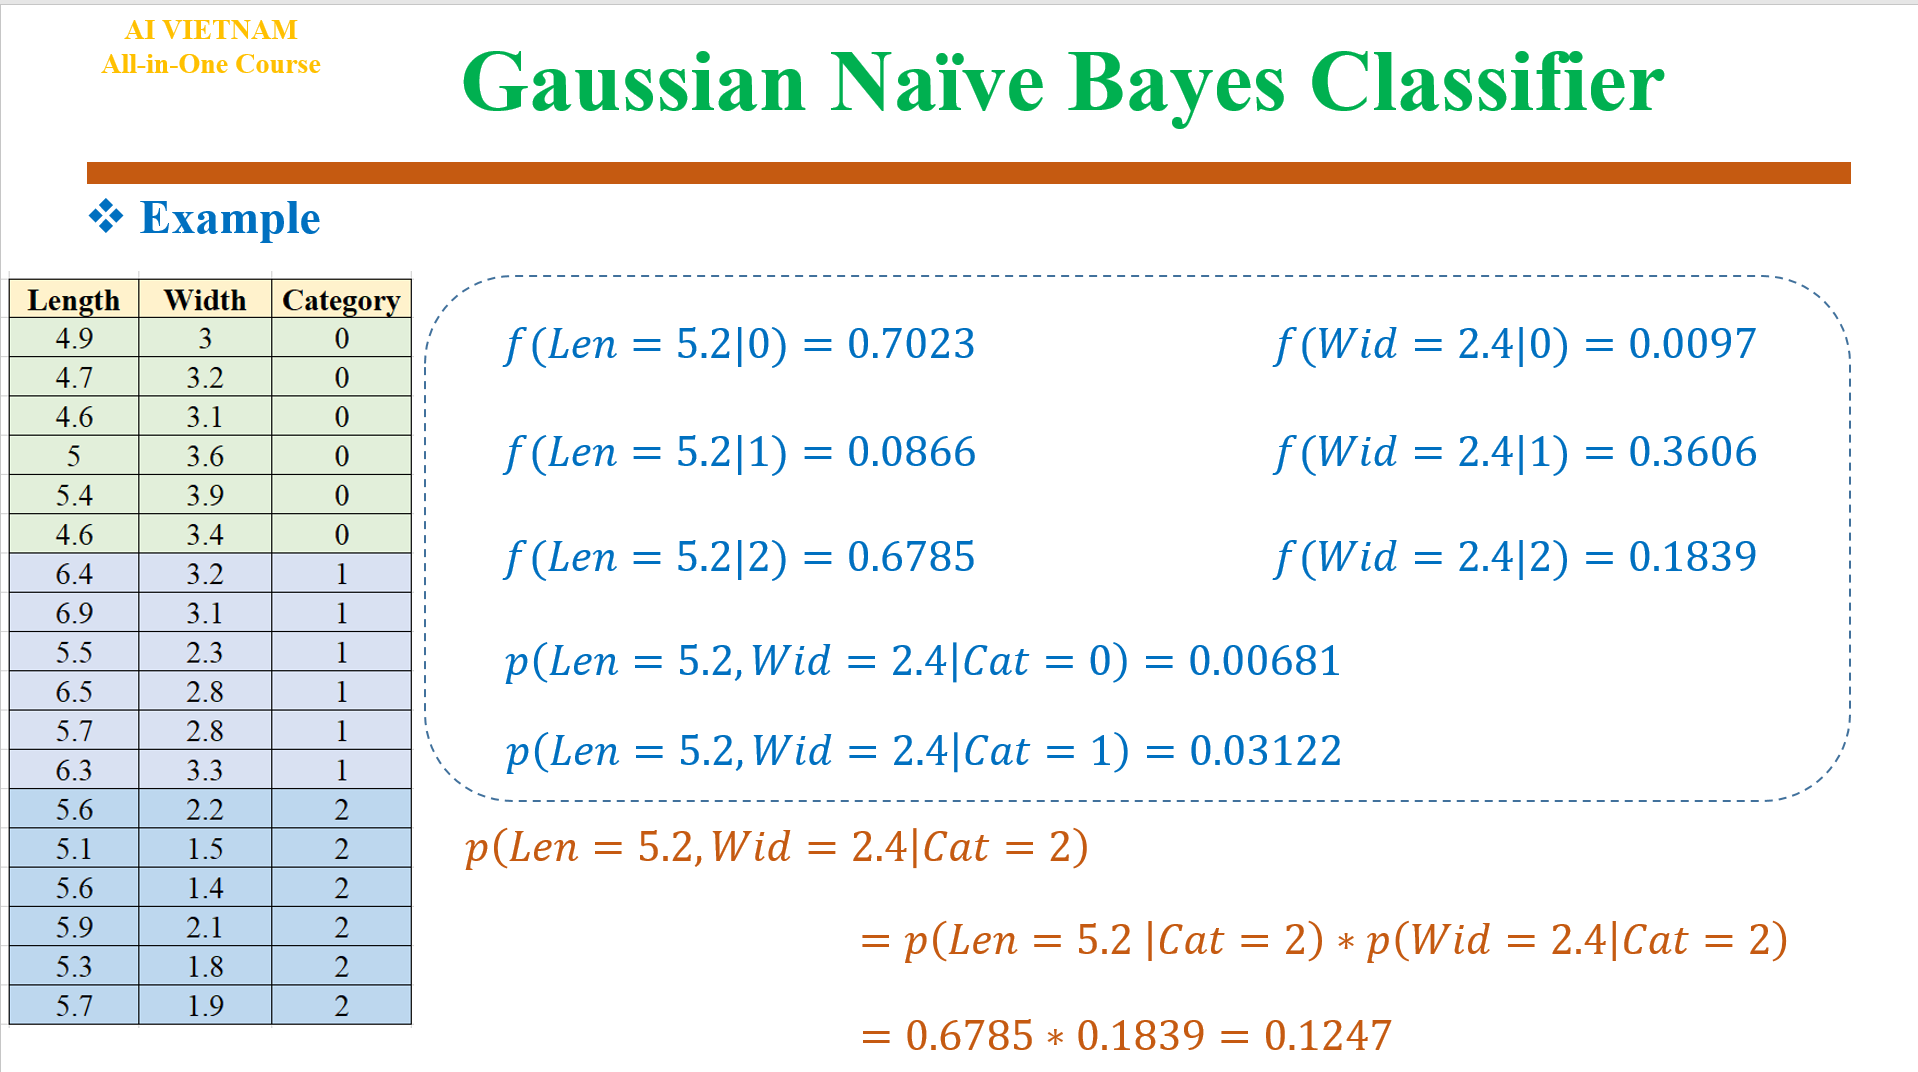

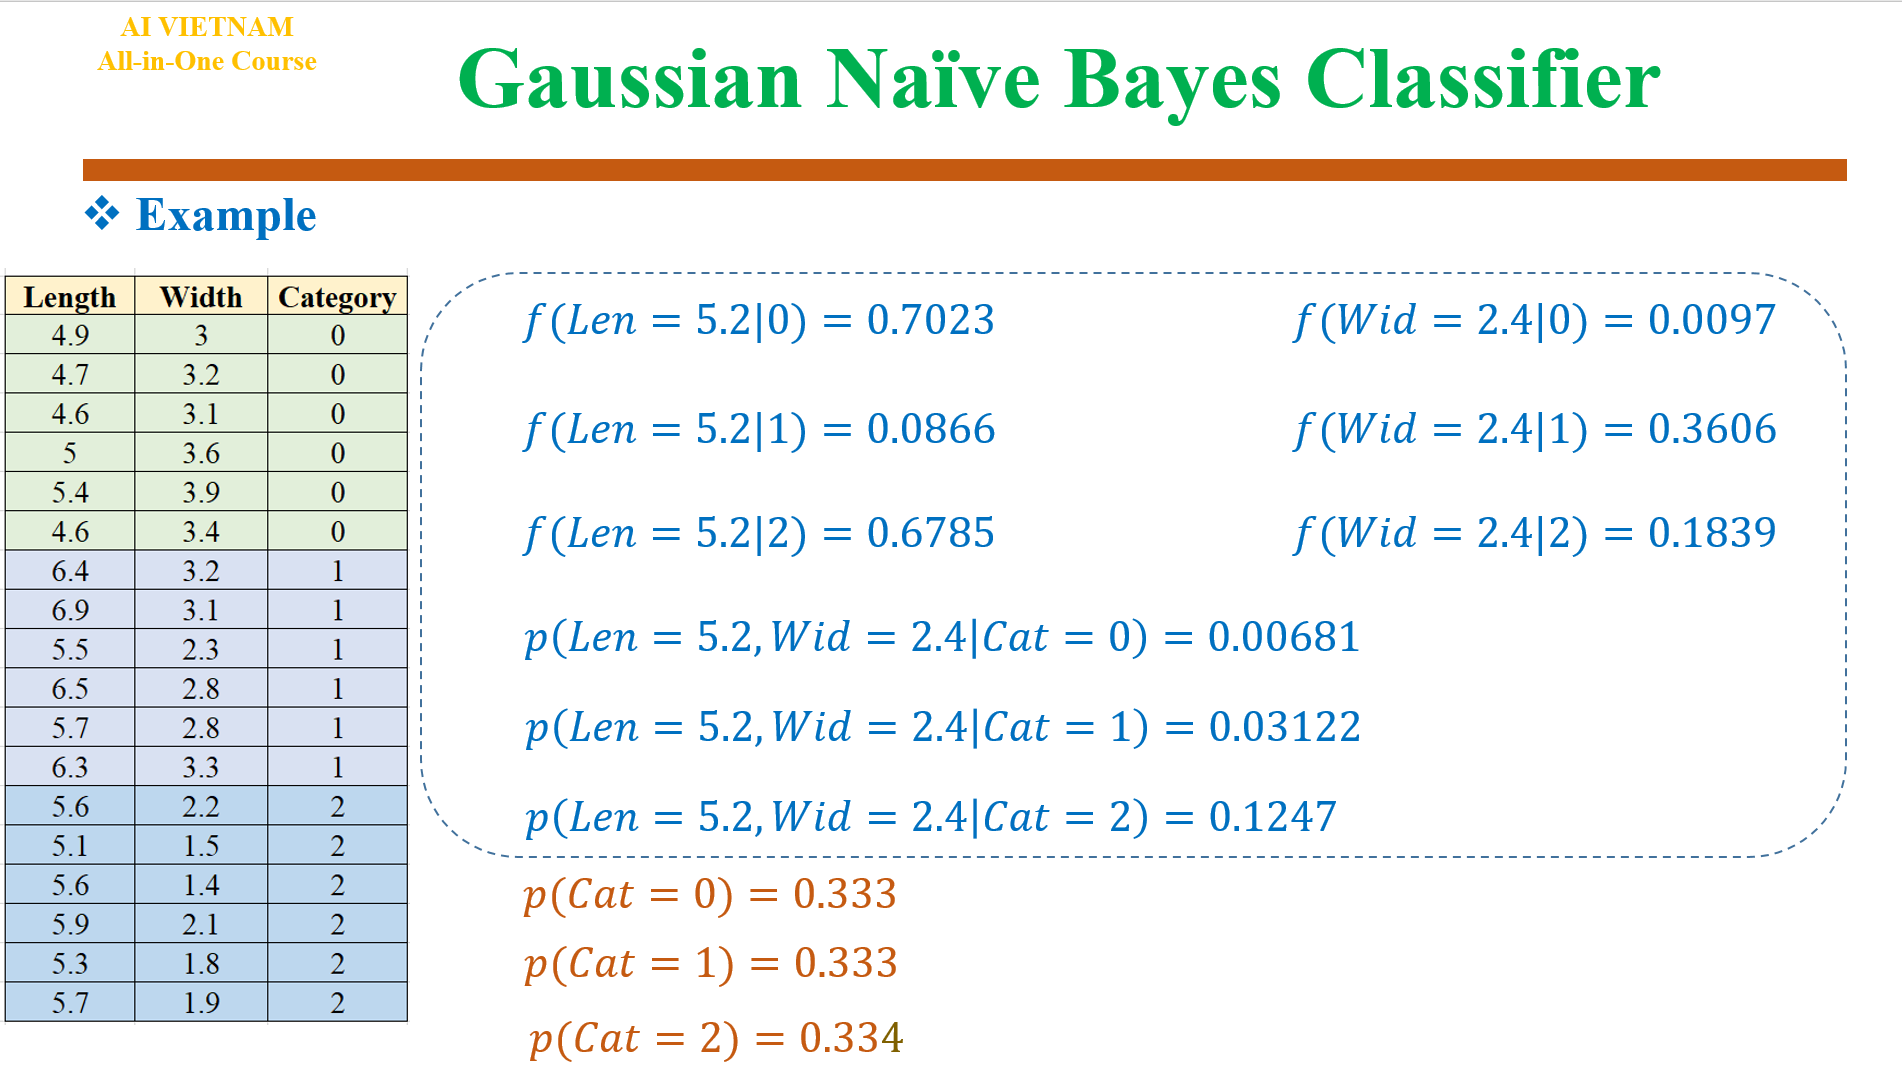

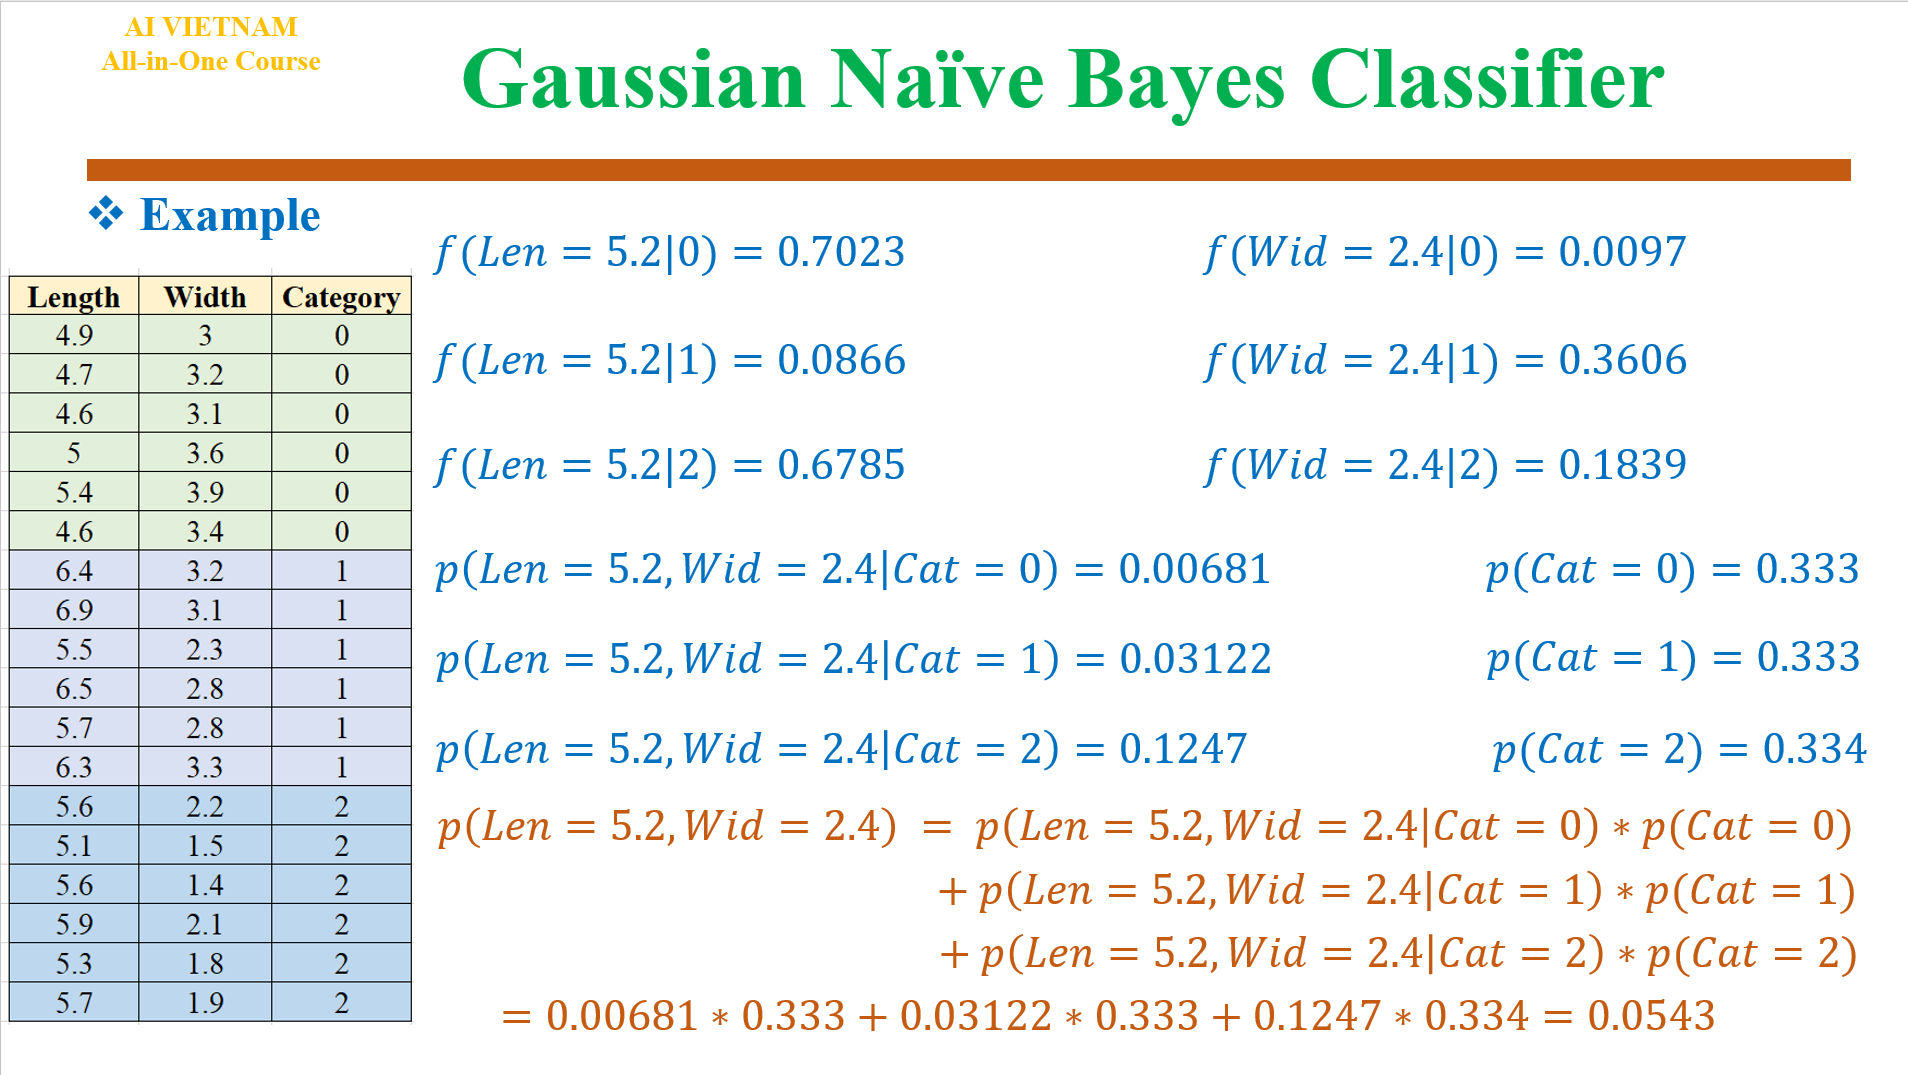

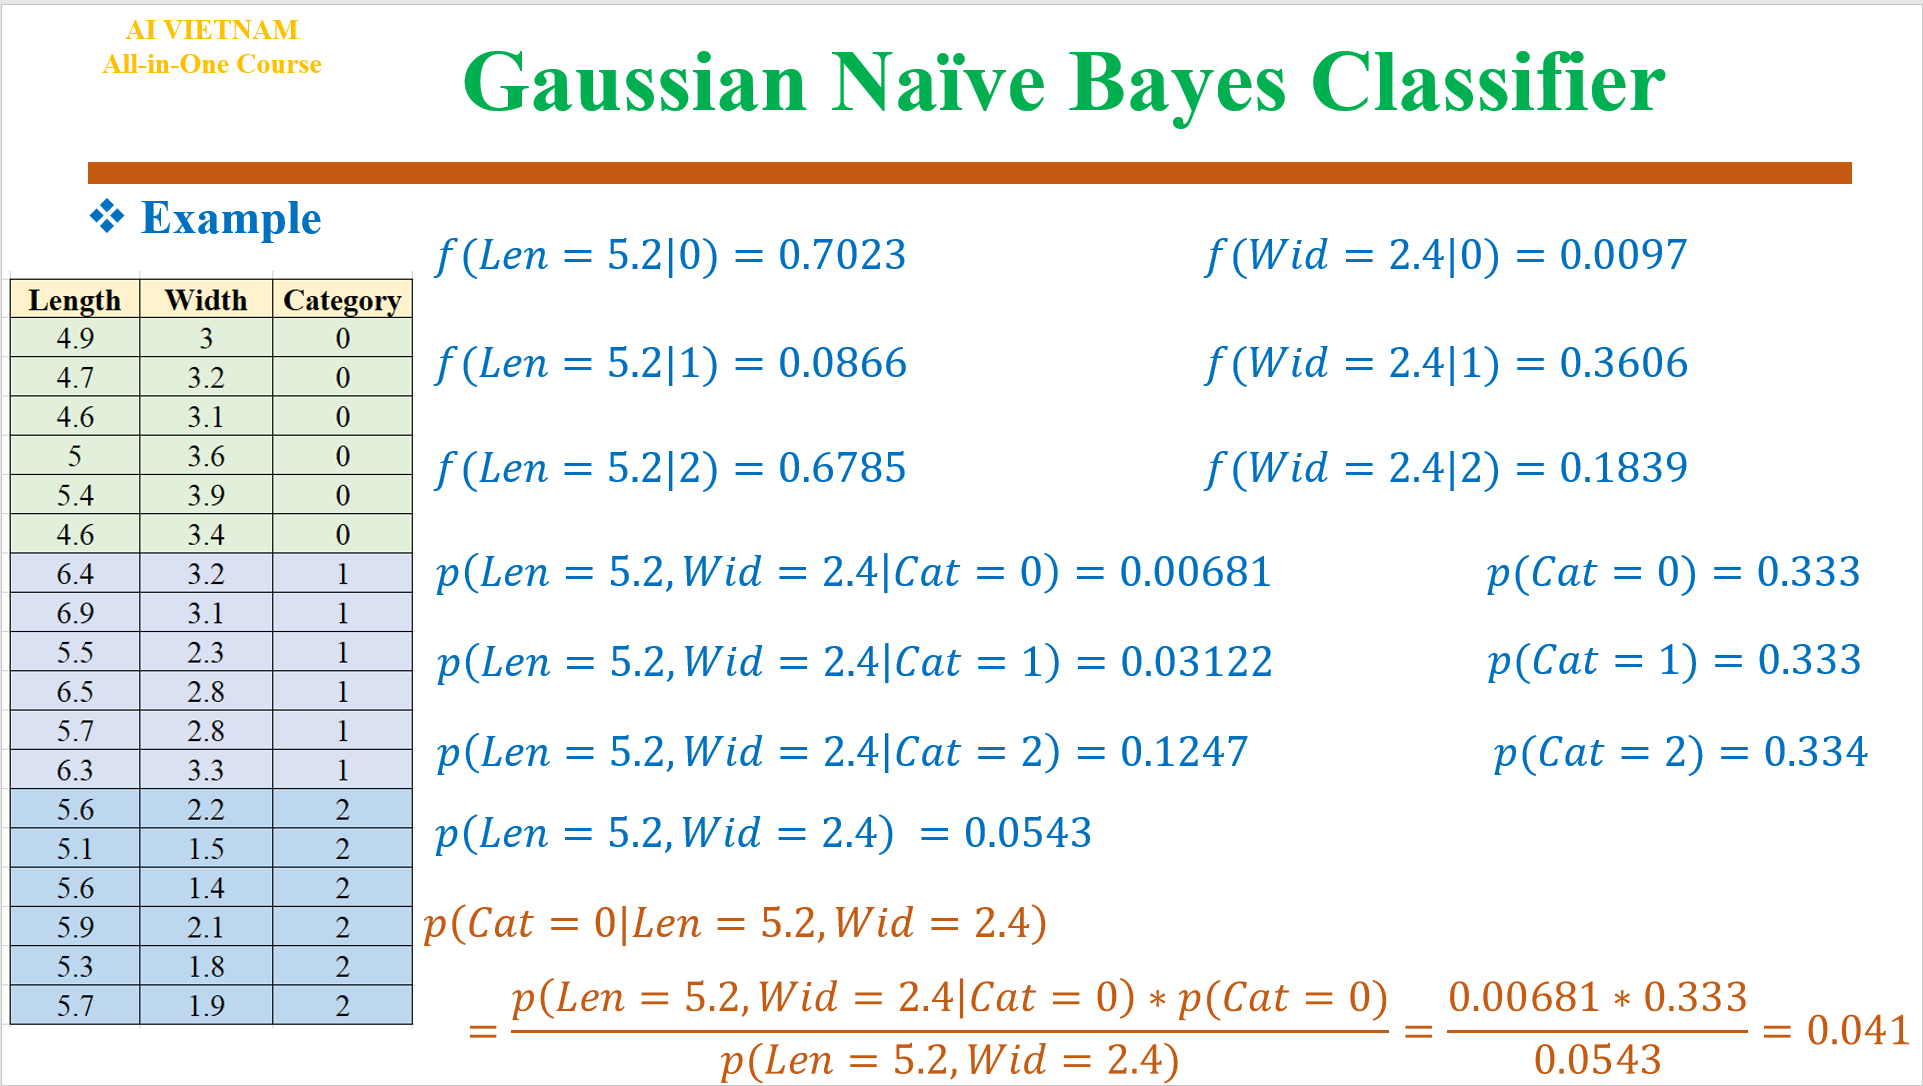

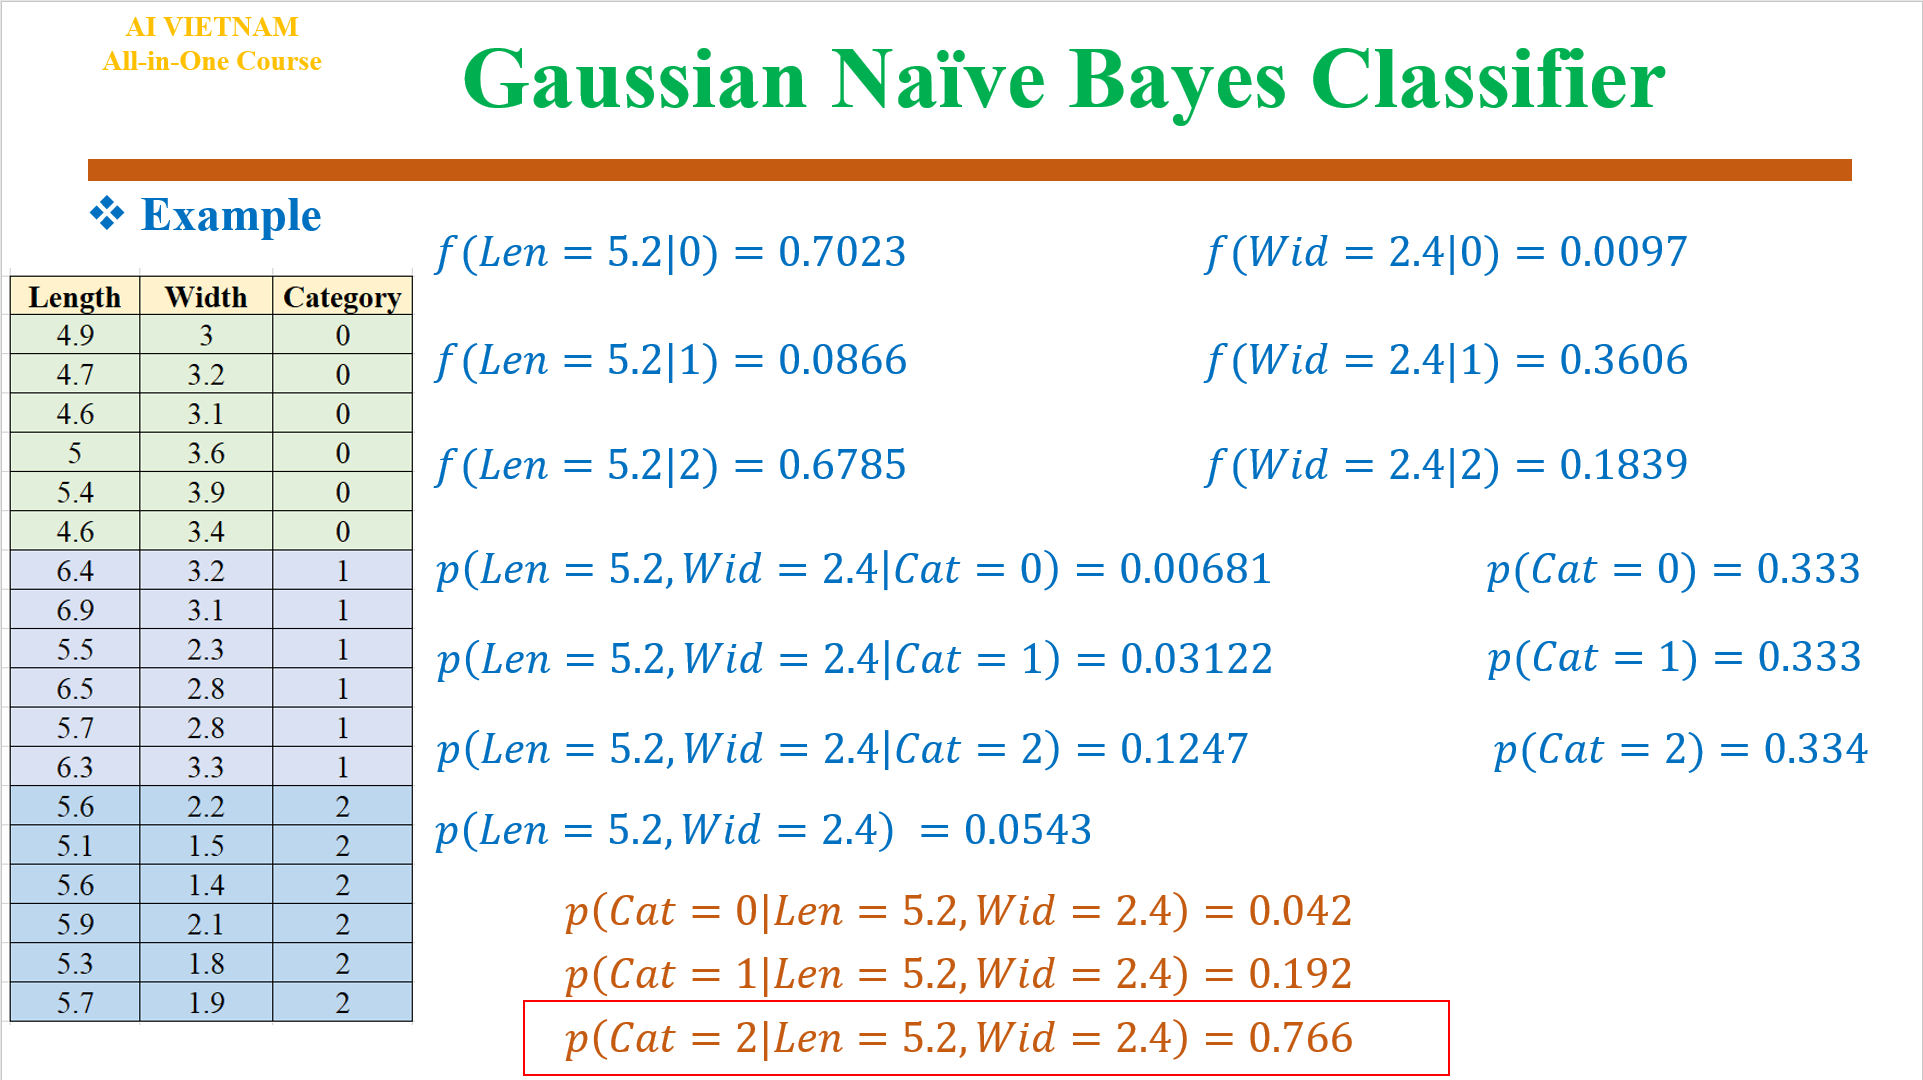

###5) Ưu điểm Naive Bayes:
---
Naive Bayes là một thuật toán hoạt động tốt trên dữ liệu nhiều chiều và phức tạp. Vì đặc thù không quan tâm để mối tương quan giữa các đặc trưng của dữ liệu nếu Naive Bayes có thời gian đào tạo nhanh.
+ Hoạt động tốt với cả dữ liệu sạch và dữ liệu nhiễu
+ Nguyên lí hoạt động đơn giản


###6) Nhược điểm của trình phân loại Naive Bayes?
---
+ Naive Bayes có một nhược điểm rất lớn đó là "Zero Frequency". Và điều này xảy khả khi khi một class không có bất kì sample nào tồn tại trong tập huấn luyện. 
+ Và một nhược điểm khác là thuật toán giả sử  các đặc trưng độc lập với nhau nhưng trong thực tế, các đặc trưng đều có mối tương quan và liên quan nhất định

###7) Ứng dụng của Naive Bayes?
---
Naive Bayes là một thuật toán rất mạnh, nó được áp dụng trong các kỹ thuật phân loại khác nhau với mục đích phân loại thời gian thực. Thuật toán được sử dụng với các tác vụ NLP như phân tích cảm xúc văn bảng, phân loại thư rác, phân loại văn bản,...

###8) Naive Bayes là một bộ phân loại phân biệt hay bộ phân loại tổng hợp?
---
Naive Bayes là một trình phân loại tổng quát . Nó học từ sự phân phối thực tế của tập dữ liệu bằng cách thực hiện các thao tác trên đó. Nó không tạo ra một ranh giới quyết định để phân loại dữ liệu. 

###9) Cách giải quyết vấn đề Zero Frequency?
---
Chúng ta có thể gặp phải lỗi chia 0 khi xác suất cho một trường hợp cụ thể trong tử số là 0. Để giảm thiểu điều này, chúng ta có thể sử dụng Laplace Smoothing về cơ bản thêm một số vào tử số và một số khác vào mẫu số.

+ Cụ thể Laplace Smoothing là kĩ thuật giúp tránh trường hợp zero frequency bằng cách cộng thêm một hằng số $\alpha$ vào tử để tránh tử số bằng 0 và cộng $d\alpha$ vào mẫu để đảm bảo tổng xác suất vẫn là 1 với d là chiều của dữ liệu.

+ Hoặc dùng log likeli hood



###10) Naïve Bayes xử lý các giá trị số và phân loại như thế nào?
+ Đối với các tính năng phân loại, chúng ta có thể ước tính xác suất của mình bằng cách sử dụng phân phối chẳng hạn như đa thức hoặc Bernoulli.
+ Đối với các tính năng số, chúng ta có thể ước tính xác suất của mình bằng cách sử dụng phân phối chẳng hạn như Bình thường hoặc Gaussian.

##Set up

In [182]:
!git clone https://github.com/NT-ThuHang/Hands_On_Machine_Learning_With_Pytorch.git
%cd /content/Hands_On_Machine_Learning_With_Pytorch

fatal: destination path 'Hands_On_Machine_Learning_With_Pytorch' already exists and is not an empty directory.
/content/Hands_On_Machine_Learning_With_Pytorch


##Library

In [183]:
#standard
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import plotly.express as px 

#prepare data
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
#modeling
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

##Dataset

In [184]:

dataset = pd.read_csv("./Dataset/play_tennis.csv")
dataset.head()

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes


In [185]:
del dataset["day"] 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   outlook   14 non-null     object
 1   temp      14 non-null     object
 2   humidity  14 non-null     object
 3   wind      14 non-null     object
 4   play      14 non-null     object
dtypes: object(5)
memory usage: 688.0+ bytes


In [186]:
encoder = LabelEncoder()
dataset = dataset.apply(encoder.fit_transform)
dataset.head()

,outlook,temp,humidity,wind,play
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1


In [187]:
dataset.astype("object").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   outlook   14 non-null     object
 1   temp      14 non-null     object
 2   humidity  14 non-null     object
 3   wind      14 non-null     object
 4   play      14 non-null     object
dtypes: object(5)
memory usage: 688.0+ bytes


In [188]:
X = dataset.drop(columns = "play")
y = dataset["play"].values
cat_col = X.select_dtypes(exclude=['object']).columns.tolist()
num_col = list(set(X.columns) - set(cat_col))

#get index of 
ind_catcol = []
for col in cat_col:
  ind_catcol.append(X.columns.get_loc(col))

ind_numcol = []
for col in num_col:
  ind_numcol.append(X.columns.get_loc(col))

ind_catcol

[0, 1, 2, 3]

In [189]:
X = dataset.drop(columns = "play").values
y = dataset["play"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 0, shuffle = True)


In [190]:
X_train = torch.tensor(X).to(device)
X_test = torch.tensor(X_test).to(device)
y_train = torch.tensor(y).to(device)
y_test = torch.tensor(y_test).to(device)

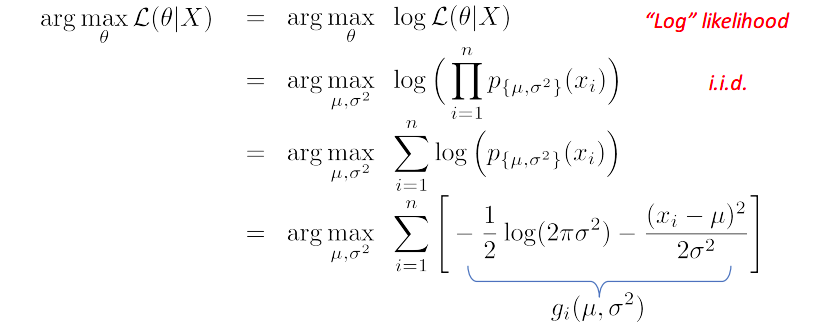

In [192]:
class NaiveBayesClassifier(nn.Module):
  """ 
    Bayes Theorem:
        P(Y|X) = P(X|Y) * P(Y) / P(X)
  """
  def __init__(self, X, y, cat_col, num_col):
    super(NaiveBayesClassifier, self).__init__()
    self.cat_col = cat_col
    self.num_col = num_col
    self.X = X
    self.y = torch.tensor(y, dtype = torch.int)
    self.total_sample = X.shape[0]
    self.n_features = X.shape[1]
    self.n_classes = len(self.y.unique())
    self.alpha = 1 #for Laplace Smoothing
    self.prior_probability_X  = {}
    self.mu = {} #keys are class label and values are feature's mean values.
    self.sigma = {} #keys are class label and values are feature's variance values.
    self.probability_X_cat  = {} #key are feature, value of feature and label and values are count of features value of label
    self.num_class_sample = {} # key are class label and values are count of label value

  def find_prior_probability_X(self):
    #compute number of sample in each class and prior probability
    for class_id in range(self.n_classes):
      self.num_class_sample[class_id] = len(self.X[self.y==class_id])
      self.prior_probability_X[class_id] = torch.log(torch.scalar_tensor(float(self.num_class_sample[class_id]/self.total_sample)))
    
  def find_sigma_and_mu(self):
    X_num = self.X[:, self.num_col]
    for class_id in range(self.n_classes):
      X_class = torch.tensor(X_num[self.y==class_id], dtype=torch.float)
      self.mu[class_id] = torch.mean(X_class, dim=0)
      self.sigma[class_id] = torch.var(X_class, dim=0)

  def find_frequency(self):
    X_cat = self.X[:, self.cat_col]
    #compute the frequency of feature's value in each classes
    for feature_id in range(self.n_features):
      self.probability_X_cat[feature_id] = {}

      for value in torch.unique(X_cat[:, feature_id]):
        value = value.item()
        self.probability_X_cat[feature_id][value] = {}

        for class_id in range(self.n_classes):
          X_feature_id_class_id = X_cat[(X_cat[:, feature_id] == value) & (self.y == class_id)]
          #laplace smoothing
          self.probability_X_cat[feature_id][value][class_id] = (len(X_feature_id_class_id) + self.alpha)/(self.num_class_sample[class_id] + len(torch.unique(X_cat[:, feature_id]))*self.alpha)


  def gaussian_naive_bayes(self, X, mu, sigma):
    """
    Get logarits of log likelihood
    log(f(x)) = log(1/sqrt((2*pi)^n_features * var) * exp(-(x-mu)^2 / (2*var^2)))
    => log(f(x)) = -n_features/2 * log(2*pi) - 0.5*log(var) -(x-mu)^2 / (2*var^2)
    """
    gaussian = -0.5 * torch.log(2*np.pi*sigma) - 0.5 * torch.pow(X-mu,2)/sigma
    return torch.sum(gaussian)

  def multinomical_naive_bayes(self, X, class_id):
    multinomical = torch.zeros(X.size()[0])
    for i in range(X.size()[0]):
      temp = 1
      for feature_id, feature_value in enumerate(X[i,:]):
        #print(torch.log(torch.scalar_tensor(self.probability_X_cat[feature_id][feature_value.item()][class_id])))
        temp += torch.log(torch.scalar_tensor(self.probability_X_cat[feature_id][feature_value.item()][class_id]))
        
      multinomical[i] = temp.item()
    return multinomical
  

  
  def test(self, X):
    #compute prior probability
    self.find_prior_probability_X()
    #print(self.prior_probability_X)

    probability = torch.zeros(X.size()[0], self.n_classes)
    for class_id in range(self.n_classes):
      probability[:, class_id] = self.prior_probability_X[class_id]


    #compute probability of numerical feature
    if (len(self.num_col)):
      X = X[:, self.num_col]
      self.find_sigma_and_mu()
      for class_id in range(self.n_classes):
        probability[:, class_id] += self.gaussian_naive_bayes(X, self.mu[class_id], self.sigma[class_id])

    #compute probability of categorical feature
    if (len(self.cat_col)):
      X = X[:, self.cat_col]
      self.find_frequency()
      for class_id in range(self.n_classes):
        #print(self.multinomical_naive_bayes(X, class_id))
        probability[:, class_id] += self.multinomical_naive_bayes(X, class_id)

    return torch.argmax(probability, dim=1)


    
model = NaiveBayesClassifier(X_train, y_train, ind_catcol, ind_numcol).to(device)
y_pred = model.test(X_test)
acc = torch.sum(y_pred == y_test)/y_test.size()[0]
acc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  # This is added back by InteractiveShellApp.init_path()


tensor(1.)